In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

In [3]:
#mlat = np.arange(50, 89, 1) #30 intervals between 53.1° to 89.7°
#mlt= np.arange(1, 360, 1) #80 intervals between 1.6° to 357.6°

#AMPERE
mlat = np.linspace(40,90,50) #50 intervals between 40° to 90°
mlt = np.linspace(0,360, 24) #24 intervals between 0° to 360°

#mlat = np.linspace(0,90,90) #50 intervals between 40° to 90°
#mlt = np.linspace(0,360,360) #24 intervals between 0° to 360°

In [4]:
def calculate_delta(lat1, lon1, lat2, lon2):
    radius = 6371.008
    
    #solution 1 in co-latitude
    #dlat = np.radians((90-lat1) - (90-lat2))
    #dlon = np.radians(lon2 - lon1)
    #delta_x = dlat * radius
    #delta_y = dlon * radius * np.sin(np.radians(90-lat1))
    
    #solution 2 in latitude
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    delta_x = dlat * radius
    delta_y = dlon * radius * np.cos(np.radians(lat1))
    
    return delta_x, delta_y

In [5]:
#areas = np.zeros((89, 359))
areas = np.zeros((49, 23))

for i in range(len(mlat) - 1):
    for j in range(len(mlt) - 1):
        lat1, lat2 = mlat[i], mlat[i + 1]
        lon1, lon2 = mlt[j], mlt[j + 1]
        
        delta_x, delta_y = calculate_delta(lat1, lon1, lat2, lon2)
        
        area = delta_x * delta_y
        areas[i, j] = area

areas

array([[151277.2397474 , 151277.2397474 , 151277.2397474 , ...,
        151277.2397474 , 151277.2397474 , 151277.2397474 ],
       [148992.69253709, 148992.69253709, 148992.69253709, ...,
        148992.69253709, 148992.69253709, 148992.69253709],
       [146660.88942302, 146660.88942302, 146660.88942302, ...,
        146660.88942302, 146660.88942302, 146660.88942302],
       ...,
       [ 10545.94566146,  10545.94566146,  10545.94566146, ...,
         10545.94566146,  10545.94566146,  10545.94566146],
       [  7032.48924118,   7032.48924118,   7032.48924118, ...,
          7032.48924118,   7032.48924118,   7032.48924118],
       [  3516.80233141,   3516.80233141,   3516.80233141, ...,
          3516.80233141,   3516.80233141,   3516.80233141]])

/tmp/ipykernel_69444/3399139529.py:7: RuntimeWarning: divide by zero encountered in log2
  x3 = np.log2(x)*2
/tmp/ipykernel_69444/3399139529.py:8: RuntimeWarning: divide by zero encountered in log10
  x4 = np.log10(x)


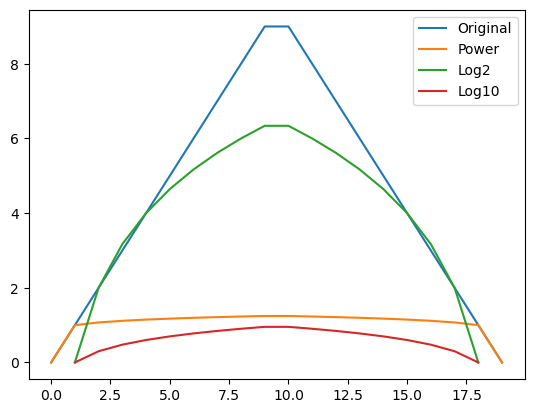

In [6]:
x_up = np.arange(0,10,1)
x_down = np.arange(0,10,1)
x = np.concatenate((x_up, x_down[::-1]))
#np array with simple hump using linspace

x2 = x**0.1
x3 = np.log2(x)*2
x4 = np.log10(x)
y = np.arange(0, len(x), 1)
plt.plot(y, x, label='Original')
plt.plot(y, x2,label='Power')
plt.plot(y, x3, label='Log2')
plt.plot(y, x4, label='Log10')
plt.legend()

In [11]:
def weighted_loss(prediction, target, weights, dampening=1):

    #weights = weights**dampening #dampen weighted err
    weights = np.log10(weights)
    weights = weights / np.min(weights)  #normalize weights

    x = np.arange(weights.shape[1])
    y = np.arange(weights.shape[0])
    f = interpolate.interp2d(x, y, weights, kind='linear')
    #f = interpolate.bisplrep(x, y, weights, s=0)
    print(f)
    xnew = np.arange(0, weights.shape[1], weights.shape[1]/(weights.shape[1]+1))
    ynew = np.arange(0, weights.shape[0], weights.shape[0]/(weights.shape[0]+1))

    weights = f(xnew, ynew)
    
    loss = np.abs(prediction - target) #MAE
    weighted_loss = loss * weights 

    print(np.mean(loss*weights))

    print(np.mean(np.abs(target - prediction) * weights))

    return weighted_loss

target = np.ones((50, 24))
prediction = target + 0.01

weight_loss = weighted_loss(prediction, target, areas)
np.unravel_index(weight_loss.argmin(), weight_loss.shape), weight_loss.min(), np.unravel_index(weight_loss.argmax(), weight_loss.shape), weight_loss.max()

0.013557608961404845
0.013557608961404845


/tmp/ipykernel_69444/278897273.py:9: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(x, y, weights, kind='linear')
/tmp/ipykernel_69444/278897273.py:15: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator`

((49, 19), 0.010000000000000009, (0, 0), 0.014606761060255229)

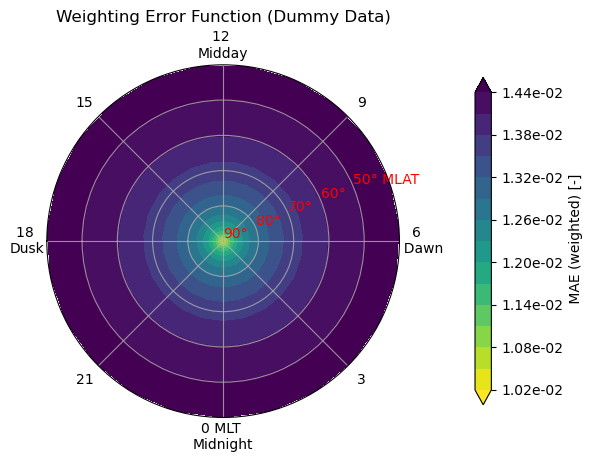

In [12]:
# Define common parameters
theta = np.linspace(0, 360,24) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(40, 90, 50)
shrink = .85

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6.5,5))

c_true = ax.contourf(theta_rad, r, weight_loss,  cmap='viridis_r', extend='both', levels=15, zorder=0)
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels(["90°", "80°", "70°", "60°", "50° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
ax.set_title(f'Weighting Error Function (Dummy Data)')
plt.colorbar(c_true, ax=ax, label=' MAE (weighted) [-]', shrink=shrink, pad=0.15, orientation='vertical', format='%.2e')
ax.grid(True, linestyle='-', alpha=0.8)
#plt.tight_layout()
#plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/weighted_MAE_AMP.png', dpi=400, bbox_inches='tight')

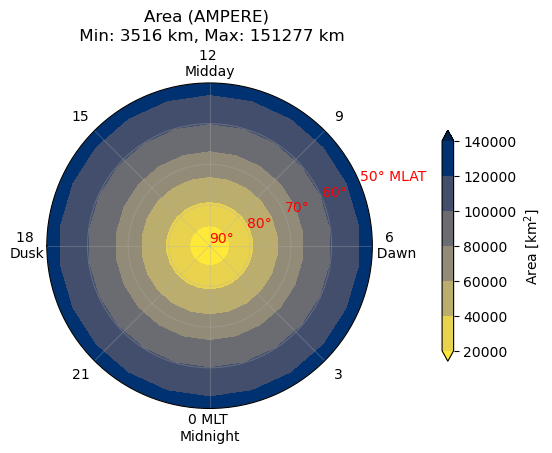

In [13]:
# Define common parameters
#r = 90 - np.linspace(53.1, 89.7, 29)
#shrink = .7

theta = np.linspace(0, 360, 23) - 90
theta_rad = theta / 360 * 2 * np.pi
r = 90 - np.linspace(40, 90, 49)
shrink = .6

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 5))

c_true = ax.contourf(theta_rad, r, areas, cmap='cividis_r', extend='both', levels=8, zorder=0)
ax.set_ylim([0, 39])
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels(["90°", "80°", "70°", "60°", "50° MLAT"], color='red')
ax.set_xlim([-np.pi, np.pi])
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
ax.set_xticklabels(["21", "0 MLT \nMidnight", "3", "6 \n  Dawn", "9", "12 \nMidday", "15", "18 \nDusk"])
a_min = int(areas.min())
a_max = int(areas.max())
ax.set_title(f'Area (AMPERE) \n Min: {a_min} km, Max: {a_max} km', linespacing=1.3)
km2 = r'$\mathrm{km^2}$'
plt.colorbar(c_true, ax=ax, label=f'Area [{km2}]', shrink=shrink, pad=0.15, orientation='vertical')
ax.grid(True, linestyle='-', alpha=0.3)
#plt.tight_layout()
#plt.savefig('/Users/sr2/My Drive/Career/Employment/Current/NIPR/Research/Assimilation/plots/Area_AMP.png',
#            dpi=400, bbox_inches='tight')